Importamos las librerías que usaremos para este modelo

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

Cargamos la base de datos a la que se le aplicaron tecnicas de sobremuestreo

In [21]:
dataHosp = pd.read_csv('../data/Hospitales_Oversample.csv')

Definimos nuestras variables predictoras **'X' _(features)_** y la variable objetivo **'y' _(target)_**

In [22]:
X = dataHosp.drop(['HOSPITALIZACION'], axis = 1)
y = dataHosp['HOSPITALIZACION']

Ahora que ya definimos nuestras variables, vamos a separar nuestros datos en entrenamiento y prueba. Utilizaremos el 20% del total para evaluar el desempeño del modelo frente a un entorno simulado de producción.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

Instanciamos nuestro modelo

In [24]:
arbol = DecisionTreeClassifier() 

Realizaremos una _`búsqueda exhaustiva`_ para encontrar los mejores hiperparámetros del modelo de clasificación. Utilizaremos la técnica de **_Grid Search Cross-Validation_**, que nos permitirá explorar diferentes combinaciones de hiperparámetros y evaluar su rendimiento mediante la validación cruzada. Nuestro objetivo es encontrar los valores óptimos para los hiperparámetros **`'max_depth', 'criterion'`**

In [25]:
rango_hiperparametros = {"max_depth":[1,2,3,4,5,6,7],
                         "criterion":["gini", "entropy"]}
modelo =  GridSearchCV(arbol, param_grid = rango_hiperparametros,cv = 5, verbose = True)

modelo.fit(X,y) #Entrenamos el modelo

print("Mejores hiperparámetros: "+ str(modelo.best_params_))
print("Mejor Score: "+str(modelo.best_score_)+'\n')

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 2}
Mejor Score: 0.9437823834196891



Realizamos un gráfico para analizar la relación entre profundidad del árbol y la precisión del mismo

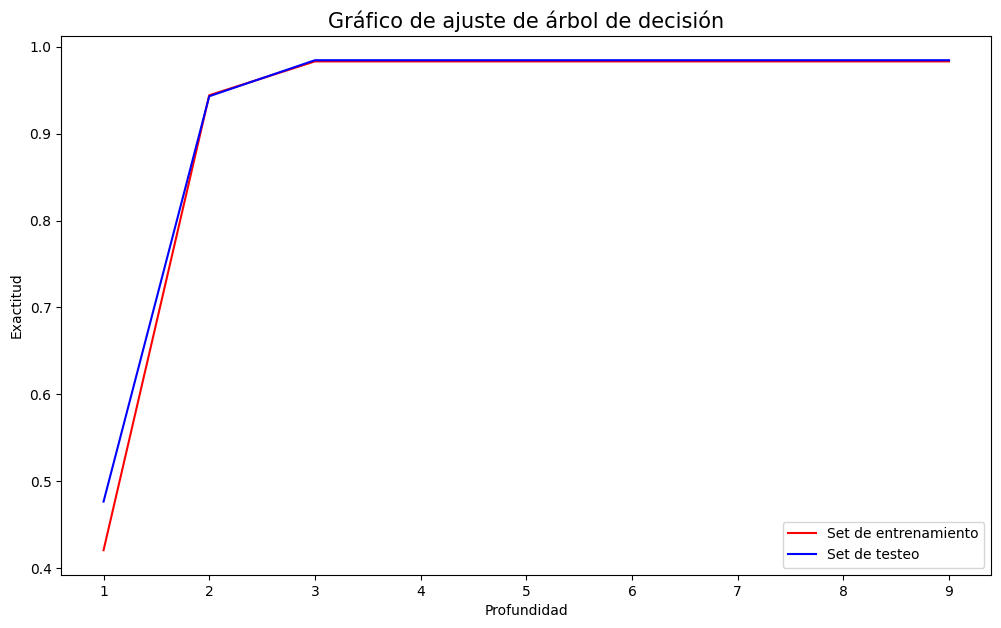

In [26]:
train_prec = []
test_prec = []
max_pairs = list(range(1, 10))

for n in max_pairs:
    clfx = DecisionTreeClassifier(max_depth=n, criterion='gini', class_weight={0: 1, 1: 5})
    clfx.fit(X_train, y_train)
    train_prec.append(clfx.score(X_train, y_train))
    test_prec.append(clfx.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_pairs, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_pairs, test_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste de árbol de decisión', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()    

#### En función de las métricas obtenidas previamente instanciamos el modelo con los parámetros mas optimos para este caso

In [27]:
clf = DecisionTreeClassifier(max_depth = 2, criterion='gini', class_weight={0: 1, 1: 5}) 

Entrenamos el modelo con los datos de entrenamiento

In [28]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=2)

Predecimos la variable objetivo con nuestro modelo

In [29]:
y_train_pred = clf.predict(X_train)

y_test_pred = clf.predict(X_test)

Importamos los modulos y realizamos el código necesario para obtener las matrices de confusión de nuestro modelo tanto para entrenamiento como para prueba

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#Creamos la matriz de confusión 
matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)

#Visualizamos
cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)


#### **`Matriz de confusión (entrenamiento)`**
#### Visualizamos la matriz de confusión con los datos de entrenamiento

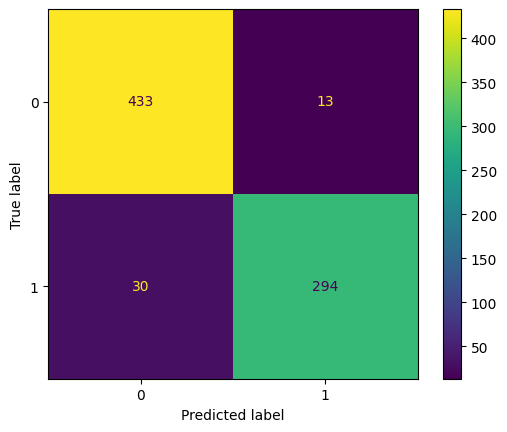

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       0.94      0.97      0.95       446
           1       0.96      0.91      0.93       324

    accuracy                           0.94       770
   macro avg       0.95      0.94      0.94       770
weighted avg       0.94      0.94      0.94       770



In [31]:
from sklearn.metrics import classification_report

cm_display.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_train, y_train_pred)}''')

#### **`Matriz de confusión (prueba)`**
#### Visualizamos la matriz de confusión con los datos de prueba

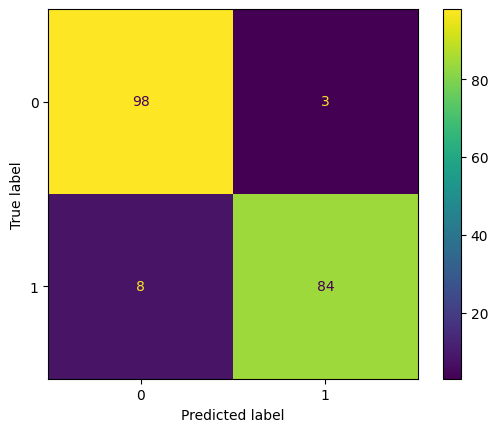

-----------------------------------------------------------------------
                    precision    recall  f1-score   support

           0       0.92      0.97      0.95       101
           1       0.97      0.91      0.94        92

    accuracy                           0.94       193
   macro avg       0.95      0.94      0.94       193
weighted avg       0.94      0.94      0.94       193



In [32]:
cm_display_2.plot()
plt.show()
print(f'''-----------------------------------------------------------------------
      {classification_report(y_test, y_test_pred)}''')

In [33]:
feature_names = list(X.columns)
importances = clf.feature_importances_

# Imprime los nombres de los features junto con sus importancias
for feature_name, importance in zip(feature_names, importances):
    print(f"{feature_name}: {importance}")

FIEBRE: 0.484265986921216
ITU: 0.00035187611171219954
SEPSIS: 0.5153821369670718
